# Introduction

# Load and check data(Choose Titanic Data to Analysis)

| Variable Name | Description |
| ------------- |:-------------:|
| Survived     | Survived (1) or died (0) | 
| Pclass      | Passenger’s class |
| Name | Passenger’s name |
| Sex | Passenger’s sex|
| Age| Passenger’s age|
| SibSp | Number of siblings/spouses aboard |
| Parch | Number of parents/children aboard |
| Ticket | Ticket number |
| Fare | Fare |
| Cabin | Cabin |
| Embarked | Port of embarkation |

**Drop the Na in the dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Titanic_dropna=pd.read_csv("titanic_data.csv").dropna()
Titanic_data=pd.read_csv("titanic_data.csv")

print "We have "+bytes(len(Titanic_data))+" data"
print "After we drop the na,we have "+bytes(len(Titanic_dropna))+" data"
print "Which means that we have drop "+bytes(len(Titanic_data)-len(Titanic_dropna))+" data"

We have 891 data
After we drop the na,we have 183 data
Which means that we have drop 708 data


Since we found that there are 708 data is na, we look more closely:

In [3]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We found that the Cabin is useless in our data analysis, so I choose to drop them down.

In [4]:
del Titanic_data['Cabin']

In [5]:
Titanic_dropna=Titanic_data.dropna()

print "Now we have "+bytes(len(Titanic_data))+" data"
print "After we drop the na,we have "+bytes(len(Titanic_dropna))+" data"
print "Which means that we have drop "+bytes(len(Titanic_data)-len(Titanic_dropna))+" data"

Now we have 891 data
After we drop the na,we have 712 data
Which means that we have drop 179 data


Now we could use data to do analysis.

In [6]:
Titanic=Titanic_dropna
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Q：How many people survived at this catastrophe? What is the distribution of the survivor?**

In [7]:
print "There are:"+bytes(len(Titanic))+" in the Titanic.And "+bytes(len(Titanic[Titanic.Survived==0]))+" of them died,"+bytes(len(Titanic[Titanic.Survived==1]))+" survived"

There are:712 in the Titanic.And 424 of them died,288 survived


**Q:At Titanic, what is the spending situation among the people?**

In [8]:
Titanic[Titanic.Fare>0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,448.438298,0.407092,2.241135,29.587475,0.519149,0.436879,34.910472
std,258.734924,0.491641,0.835137,14.524925,0.933888,0.857322,53.088296
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,222.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.850000
75%,677.000000,1.000000,3.000000,38.000000,1.000000,1.000000,33.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


As the data describe has shown. Among 891 data, the highest spending is 512.3292, the lowest is 4.0125.

**Q：What is the characteristics of the survivor?**

Load survivor data:

In [9]:
male_survived=Titanic[(Titanic.Survived==1) & (Titanic.Sex=='male')]
female_survived=Titanic[(Titanic.Survived==1) & (Titanic.Sex=='female')]

In [10]:
male_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000
mean,483.978495,1.0,1.978495,27.276022,0.408602,0.397849,43.793865
std,234.364635,0.0,0.920521,16.504803,0.646673,0.677909,76.649011
min,22.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,284.000000,1.0,1.000000,18.000000,0.000000,0.000000,9.500000
50%,510.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.287500
75%,674.000000,1.0,3.000000,36.000000,1.000000,1.000000,52.554200
max,890.000000,1.0,3.000000,80.000000,4.000000,2.000000,512.329200


In [11]:
female_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000
mean,445.389744,1.0,1.830769,28.630769,0.538462,0.594872,55.393334
std,256.288561,0.0,0.791108,14.030672,0.768120,0.858538,67.508971
min,2.000000,1.0,1.000000,0.750000,0.000000,0.000000,7.225000
25%,257.000000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,436.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,651.000000,1.0,2.000000,36.000000,1.000000,1.000000,77.343750
max,888.000000,1.0,3.000000,63.000000,4.000000,5.000000,512.329200


Fare
Survived                
0        mean  22.965456
         std   31.448825
1        mean  51.647672
         std   70.664499

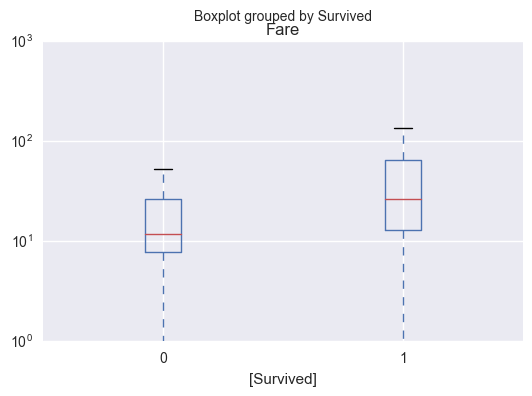

In [12]:
Titanic.boxplot(column=['Fare'],by=['Survived']).set_yscale('log')
pd.DataFrame(Titanic.groupby(['Survived'])['Fare'].describe().loc[:,['mean','std']])

After exclude the unknown infromation, the mean of male survivor is lower than female survivor.

And we found that the mean of fare that survivor have spent is higher than the dead.

So we could draw a conclusion that **survivor have spent more money on board.**

The oldest survivor is 80 years old. The oldest female survivor is 63 years old.

Now we discover whether the sex really affect survived rate.

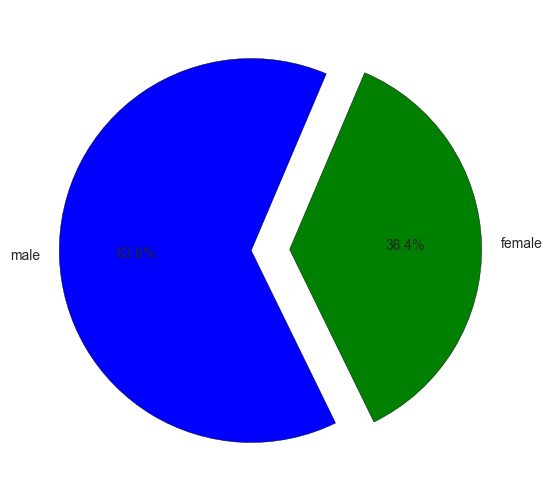

In [13]:
from pylab import *
figure(1,figsize=(6,6))
ax=axes([0.1,0.1,0.8,0.8])

labels='male','female'

x=[len(Titanic[Titanic.Sex=='male']),len(Titanic[Titanic.Sex=='female'])]

explode=(0.1,0.1)

pie(x,explode=explode,labels=labels,autopct='%1.1f%%',startangle=67)

show()

As the Pie shows that,the number of male are nealy equals to the female.

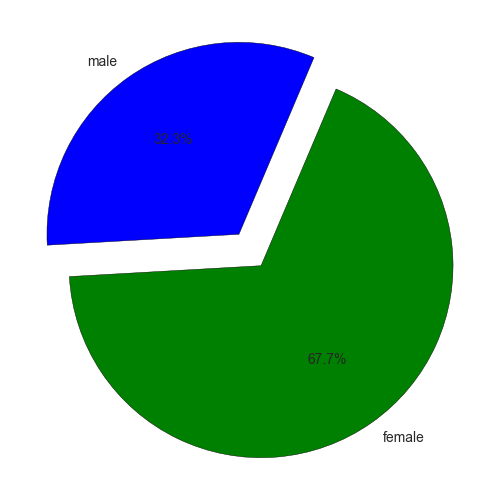

In [14]:
figure(2,figsize=(6,6))
ax=axes([0.1,0.1,0.8,0.8])

labels='male','female'

x=[len(male_survived),len(female_survived)]

explode=(0.1,0.1)

pie(x,explode=explode,labels=labels,autopct='%1.1f%%',startangle=67)

show()

Though we found that the number of men abroad are more than wowen. We found that the survived rate of female are as twice as male.

However, we as we know that, man have more strength than women. 

So we could only explain the results that **Men gave up their choice to live to women, so that women could lived!**

In [15]:
# Pie_Three arguments.
def draw_pie_3(label_1,label_2,label_3,data_1,data_2,data_3):
    plt.figure(figsize=(5,8))
    labels = [label_1,label_2,label_3]
    sizes=[data_1,data_2,data_3]
    colors = ['lightskyblue','yellowgreen','red']
    explode = (0.05,0,0)
    patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
    for t in l_text:
        t.set_size=(30)
    for t in p_text:
        t.set_size=(20)
    plt.axis('equal')
    plt.legend()
    plt.show()

## Exploration

**Q1.Whether the rich people have privilege to live comparing to the poor during this catastrophe?**

### Set Assumption:

$\bar x_{die}$:The mean fare of the dead people.

$\bar x_{survived}$:The mean fare of the survivor.

$H_0$:People who survived have more money than who died.

$$Which \space means:\bar x_{survivor}\geq\bar x_{died}$$

$H_1$:People who survived have less money than who died.

$$Which \space means:\bar x_{survivor}\leq\bar x_{died}$$

Set definition: Rich people have more money to spend in the ship than the poor. So the fare cost is to be concerned as whether he or she is wealthy or not.

In [16]:
Titanic[Titanic.Survived==1].dropna()['Fare'].describe()

count    288.000000
mean      51.647672
std       70.664499
min        0.000000
25%       13.000000
50%       26.250000
75%       65.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
Titanic[Titanic.Survived==0].dropna()['Fare'].describe()

count    424.000000
mean      22.965456
std       31.448825
min        0.000000
25%        7.895800
50%       11.887500
75%       26.550000
max      263.000000
Name: Fare, dtype: float64

$$\bar x_{die}=22.965456$$

$$\bar x_{survivor}=51.647672$$

So we got: $\bar x_{die}<\bar x_{survivor}$

More poor people died in this catastrophe.

Although we found that $\bar x_{die}<\bar x_{survivor}$. After our first exploration, we could remain curiosity of the result that why people who are survived have spent more money than people who died in this catastrophe, since we didn't have the map of room on the Titanic so the room location could never be a evidence to prove our assumption that the privilege comes to the spatial arrangement of the room so people who sleep in better class could escape faster.

But **Does where the social class affect the survived rate?**

**Q2.Whether the Pclass really affect the survived rate?**

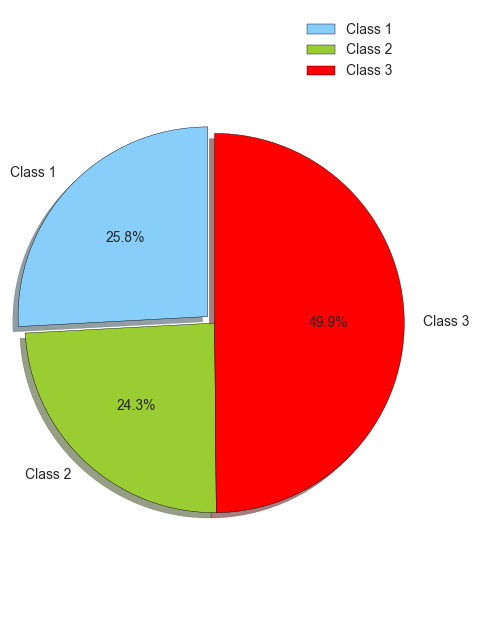

In [18]:
draw_pie_3('Class 1','Class 2','Class 3',len(Titanic[Titanic.Pclass==1]),len(Titanic[Titanic.Pclass==2]),len(Titanic[Titanic.Pclass==3]))

The pie above have list the distribution of each class on the Titanic.

Now, we give the the distribution of the survivor Pclass distribution.

Define:

* $P_{Class1\space survivor}$:The survivor rate of Pclass1
* $P_{Class2\space survivor}$The survivor rate of Pclass2
* $P_{Class2\space survivor}$The survivor rate of Pclass3

$H_0:P_{Class1\space survivor}<P_{Class2\space survivor}<P_{Class2\space survivor}$

We could say that PClass do affect survived rate and the higher class people be, the higher the survived rate is.

$H_1:P_{Class1\space survivor}\geq P_{Class2\space survivor}\geq P_{Class2\space survivor}$

We could say that PClass do affect survived rate and the lower class people be, the lower the survived rate is.

In [19]:
Pclass1_Survived=(len(Titanic[(Titanic.Pclass==1)&(Titanic.Survived==1)]))
Pclass1_all=len(Titanic[Titanic.Pclass==1])

print Pclass1_Survived
print Pclass1_all

120
184


So:$P_{Class1\space survivor}=0.652$

In [20]:
Pclass2_Survived=(len(Titanic[(Titanic.Pclass==2)&(Titanic.Survived==1)]))
Pclass2_all=len(Titanic[Titanic.Pclass==2])

print Pclass2_Survived
print Pclass2_all

83
173


So:$P_{Class2\space survivor}=0.479768$

In [21]:
Pclass3_Survived=(len(Titanic[(Titanic.Pclass==3)&(Titanic.Survived==1)]))
Pclass3_all=len(Titanic[Titanic.Pclass==3])

print Pclass3_Survived
print Pclass3_all

85
355


So:$P_{Class3\space survivor}=0.2394$

We could get the information that the class 1 is at the dominated position.

Since we got:$H_1:P_{Class1\space survivor}> P_{Class2\space survivor}>P_{Class2\space survivor}$

We could say that PClass do affect survived rate and the lower class people be, the lower the survived rate is.

It's obviously that Class 3 has the most valuable resources than others. **I assume that people in PClass have a strong humanitarianism spirit which means they have gave up their chance to survived, so more teenagers and women who regarded as the vulnerable groups could survived.** It's really a good thing.

So we assume that adults gave the chance to live to the children. Does it really true?

In [22]:
Titanic[Titanic.Survived==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,288.000000,288.0,288.000000,288.000000,288.000000,288.000000,288.000000
mean,457.850694,1.0,1.878472,28.193299,0.496528,0.531250,51.647672
std,249.666625,0.0,0.836340,14.859146,0.732512,0.808747,70.664499
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,261.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,666.500000,1.0,3.000000,36.000000,1.000000,1.000000,65.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [23]:
Titanic[Titanic.Survived==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


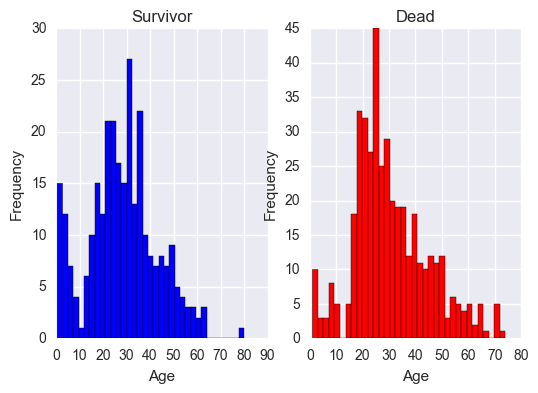

In [24]:
plt.subplot(121)
ax=plt.gca()

ax.hist(Titanic[Titanic.Survived==1]['Age'],bins=35,color='b')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.set_title('Survivor')

plt.subplot(122)
ax=plt.gca()

ax.hist(Titanic[Titanic.Survived==0]['Age'],bins=35,color='r')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.set_title('Dead')
plt.show()

First, as we have discover that the mean of survivor(28.193299) which is lower than the dead(30.626179)

And as the bar chart have shown that we could figure out that there are more children survived.

We could prove that, **people really choose to give up their chance to live and let children to live instead.**

# Conclusion 

## What we found? 

1. The high Class choose to face up to death rather than watch people died only because they have few resources. The social class has no relationship between survived rate.
* Survivor have spent more money on board.
* Man choose to died to let women live.
* People choose to people choose to give up their chance to live and let children to live instead.

## The Limitation

1. In the dataset,we have 891 data.After we drop the na,we have 183 data.Which means that we have drop 708 data. Because we have drop too many na, so it may be affect our result and strongly decrease our sample size. All our conclusions are made upon the 183 data that is reliable.
* We could explain why survivor have spent more money than the victims.
* All of our explanation were based on basic priori assumption of our morality and humanity, we didn't consider something more than morality and humanity such as economic and ethics that is more harder to comprehend.
* We didn't consider the how the number of siblings/spouses aboard and the number of parents/children aboard affect our solution.


**Reference**

1. SciPy Reference Guide-Release 0.18.1,by SciPy community
2. [Data Recourse](https://www.kaggle.com/c/titanic/data)